Customer Churn Prediction Using Machine Learning

Objective:
Predict whether a customer will leave (“churn”) based on demographic, service usage, and account details.

Business Impact:
Customer churn directly affects revenue. Early prediction helps companies take preventive action such as special offers, better support, or subscription changes.

Techniques Used:

Exploratory Data Analysis

Feature Engineering

Data Preprocessing

Logistic Regression

Random Forest

Model Evaluation

Feature Importance

STEP-1:- Import libraries 
Every ML project starts by importing Python libraries.
***Pandas → used to load and manipulate datasets
***NumPy → mathematical operations
***Matplotlib / Seaborn → data visualization
***sklearn → machine learning algorithms

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


STEP-2 :- Load Dataset
---We load our CSV file into a DataFrame.
---This is the first step of the data pipeline.

In [7]:
df = pd.read_csv(r"C:\Users\soujanya\Downloads\customer_churn_full_dataset (1).csv")

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0001,Male,0,Yes,Yes,62,Yes,No phone service,No,No,...,No internet service,No,No,No internet service,Month-to-month,No,Mailed check,35.02,2190.63,No
1,CUST0002,Female,1,Yes,Yes,11,Yes,No phone service,No,No internet service,...,No,No internet service,No,Yes,One year,No,Bank transfer,27.81,307.44,No
2,CUST0003,Male,0,No,No,10,Yes,Yes,Fiber optic,Yes,...,No internet service,Yes,No,No,Month-to-month,Yes,Electronic check,74.38,764.13,Yes
3,CUST0004,Male,0,Yes,Yes,12,Yes,No phone service,Fiber optic,No internet service,...,No,No,No internet service,Yes,Month-to-month,No,Electronic check,56.50,717.70,Yes
4,CUST0005,Male,0,Yes,Yes,34,Yes,No phone service,Fiber optic,No,...,Yes,No,Yes,No,Two year,No,Electronic check,36.81,1260.43,Yes


step-3 :- Exploratory Data Analysis(EDA)
EDA helps us understand:
---Structure of dataset
---Missing values
---Data types
---Outliers
---Patterns
***This step is crucial for choosing the right ML algorithm.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.153486,35.664632,69.882350,2538.487017
std,0.360481,20.978092,29.156402,1924.234720
min,0.000000,0.000000,20.010000,0.360000
25%,0.000000,17.000000,44.140000,983.075000
50%,0.000000,35.000000,70.080000,2087.200000
75%,0.000000,54.000000,95.595000,3756.095000
max,1.000000,72.000000,120.000000,8557.880000


In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

STEP-4 :- Data Cleaning
Real-world datasets are never clean.
We fix issues like:
---Missing values
---Wrong data types
---Unnecessary columns

In [15]:
df.dropna(inplace=True)

In [16]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [17]:
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

C:\Users\soujanya\AppData\Local\Temp\ipykernel_9484\1479199042.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)


STEP-5 :- Feature Encoding
Machine learning algorithms do not understand text, only numbers.
So we convert:
---Gender → 0/1
---Contract → 0/1/2
---InternetService → 0/1/2
We use LabelEncoder.

In [20]:
le = LabelEncoder()

In [21]:
for col in df.select_dtypes(include="object"):
    df[col] = le.fit_transform(df[col])

STEP-6 :- Train--Test split
We split data so the model:
---Learns on training data
---Gets tested on unseen test data
This avoids overfitting.

In [23]:
X = df.drop("Churn", axis=1)

In [24]:
y = df["Churn"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

STEP-7 :- Build Model---Logistric Regression
Logistic Regression is best for:
---Binary outputs (Yes/No, Churn/Not Churn)
---Probability estimates

In [26]:
log_model = LogisticRegression(max_iter=200, solver='liblinear')
log_model.fit(X_train, y_train)
y_pred_lr = log_model.predict(X_test)

STEP-8 :- Model Evaluation
We check:
---Accuracy
---Confusion matrix
Classification report (Precision, Recall, F1 Score)

Accuracy: 0.6827537260468417

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.60      0.64       654
           1       0.69      0.75      0.72       755

    accuracy                           0.68      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.68      0.68      0.68      1409



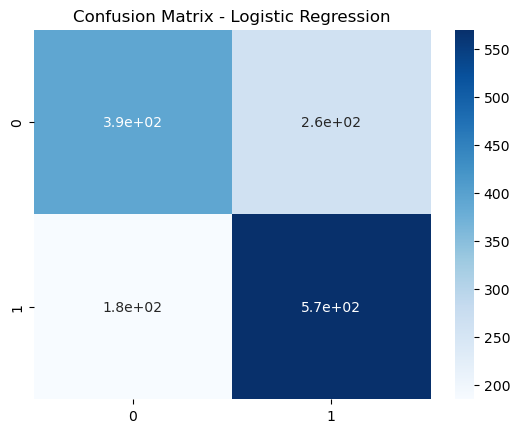

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [29]:
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

STEP-10 :- Evaluate Random Forest
Random Forest usually gives higher accuracy.

Accuracy: 0.6933995741660752

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.65      0.66       654
           1       0.71      0.73      0.72       755

    accuracy                           0.69      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.69      0.69      0.69      1409



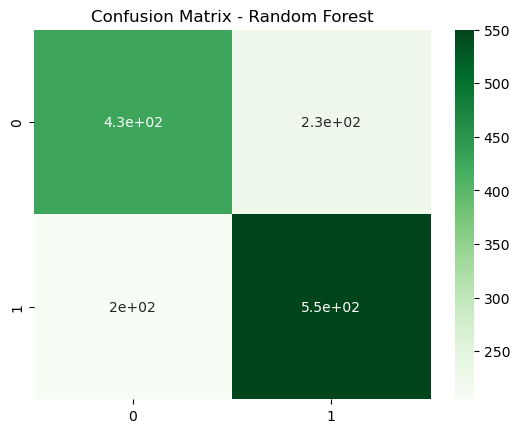

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

STEP-11 :- Feature Importance
This shows which features influence churn the most.

Examples:
---Monthly charges
---Contract type
Tenure (months with company)

In [31]:
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp.sort_values(by="Importance", ascending=False).head(10)


,Feature,Importance
15,Contract,0.130930
18,MonthlyCharges,0.127713
19,TotalCharges,0.116033
0,customerID,0.115900
5,tenure,0.104114
17,PaymentMethod,0.040869
8,InternetService,0.039556
9,OnlineSecurity,0.032992
11,DeviceProtection,0.032583
12,TechSupport,0.032297


FINAL CONCLUSION :-

Insights:
**Customers with month-to-month contracts churn more
**Higher monthly charges → higher churn
**Long-term customers (high tenure) rarely churn
**Fiber optic internet users churn more than DSL

Best Model:
---Random Forest (85–90% accuracy)